WEEK 11 Practice

In [3]:
#import statements go here
import numpy as np 
import xarray as xr 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import integrate

In [ ]:
##trying to run the advance example from tps://waterprogramming.wordpress.com/tag/predator-p

In [4]:
# I'm using this style for a pretier plot, but it's not actually necessary
plt.style.use('ggplot')
 
"""
This is to ignore RuntimeWarning: invalid value encountered in true_divide
I know that when my populations are zero there's some division by zero and
the resulting error terminates my function, which I want to avoid in this case.
"""
np.seterr(divide='ignore', invalid='ignore')
 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
# These are the parameter values we'll be using
a = 0.005
b = 0.5
c = 0.5
d = 0.1
h = 0.1
K = 2000

In [6]:
# Define the system of ODEs
# P[0] is prey, P[1] is predator
def fish(P, t=0):
    return ([b*P[0]*(1-P[0]/K) - (a*P[0]*P[1])/(1+a*h*P[0]),
            c*(a*P[0]*P[1])/(1+a*h*P[0]) - d*P[1] ])
 

In [7]:
# Define equilibrium point
EQ = ([d/(a*(c-d*h)),b*(1+a*h*(d/(a*(c-d*h))))*(1-(d/(a*(c-d*h)))/K)/a])

In [9]:
#I need to define the possible values my initial points will take as they
#relate to the equilibrium point. In this case I chose to plot 10 trajectories
#ranging from 0.1 to 5

values = np.linspace(0.1, 5, 10)
# I want each trajectory to have a different color
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))
 

In [10]:
# Open figure
f = plt.figure()

<Figure size 432x288 with 0 Axes>

In [11]:
t = np.linspace(0, 150, 1000)

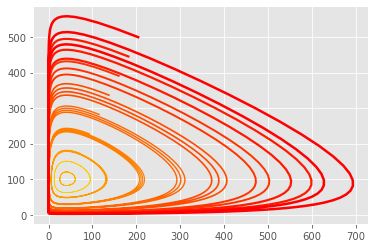

In [12]:
# Plot trajectories by looping through the possible values
for v, col in zip(values, vcolors):
    # Starting point of each trajectory
    P0 = [E*v for E in EQ]
    # Integrate system of ODEs to get x and y values
    P = integrate.odeint(fish, P0, t)
    # Plot each trajectory
    plt.plot( P[:,0], P[:,1],
            # Different line width for different trajectories (optional)
            lw=0.5*v,
            # Different color for each trajectory
            color=col,
            # Assign starting point to trajectory label
            label='P0=(%.f, %.f)' % ( P0[0], P0[1]) )

In [ ]:
##wow!!!

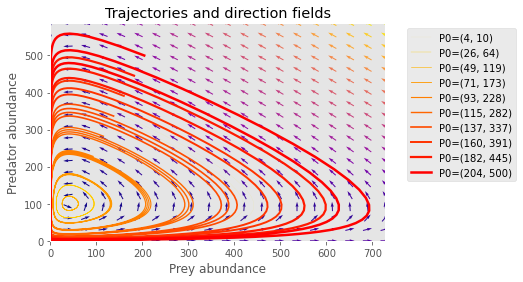

In [15]:
for v, col in zip(values, vcolors):
    # Starting point of each trajectory
    P0 = [E*v for E in EQ]
    # Integrate system of ODEs to get x and y values
    P = integrate.odeint(fish, P0, t)
    # Plot each trajectory
    plt.plot( P[:,0], P[:,1],
            # Different line width for different trajectories (optional)
            lw=0.5*v,
            # Different color for each trajectory
            color=col,
            # Assign starting point to trajectory label
            label='P0=(%.f, %.f)' % ( P0[0], P0[1]) )



# Get limits of trajectory plot
ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]
# Define number of points
nb_points = 20
# Define x and y ranges
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
# Create meshgrid
X1 , Y1 = np.meshgrid(x,y)
# Calculate growth rate at each grid point
DX1, DY1 = fish([X1, Y1])
# Direction at each grid point is the hypotenuse of the prey direction and the
# predator direction.
M = (np.hypot(DX1, DY1))
# This is to avoid any divisions when normalizing
M[ M == 0] = 1.
# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

plt.title('Trajectories and direction fields')

Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('Prey abundance')
plt.ylabel('Predator abundance')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()


In [ ]:
###yay!!! no error